In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.saving import register_keras_serializable
from tensorflow.keras.applications import VGG19
import datetime
from sklearn.metrics import precision_recall_curve

# **Testing**

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [3]:
x_train = x_train/255.0
x_val = x_val/255.0

In [22]:
encoder_input = tf.keras.layers.Input(shape=(28,28,1))
x = tf.keras.layers.Flatten()(encoder_input)
encoder_output = tf.keras.layers.Dense(256, activation='relu')(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = tf.keras.layers.Dense(128, activation='relu')(encoder_output)
x = tf.keras.layers.Dense(784, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Reshape((28,28,1))(x)

autoencoder = tf.keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,992 (1.28 MB)

 Trainable params: 334,992 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder.compile(tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mse')

autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0110
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0098
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0092


In [ ]:
test = autoencoder.predict(x_val[0].reshape(-1,28,28,1))[0]
test.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[1.1895545  1.0543425  0.37757194 1.0539631  0.8627418  0.8620721
  0.6858041  0.42335752 0.9484832  1.8738371  1.3039634  0.9728574
  0.57437897 0.6788248  0.62139046 0.23952508]
 [0.62847203 0.73789144 1.485988   0.9847955  1.682204   1.2071139
  1.0732362  0.76858    0.8328409  1.9183947  0.7395315  1.0932549
  0.2526654  0.43445897 0.66812736 0.8001471 ]
 [1.3007375  1.1897982  0.6567374  0.6260133  0.67630434 0.43824753
  1.0536023  0.5620128  1.6403995  1.5772513  0.98589784 1.0816039
  0.92581964 1.2669325  0.64806    1.1183285 ]
 [0.79394466 0.73137957 0.5503149  1.9749103  0.46771613 1.526174
  0.         0.3214605  2.1637409  1.4301504  0.8989296  0.38788125
  1.2992724  1.2070817  0.71106887 1.1616987 ]
 [1.9316238  0.85898054 0.51931554 0.3661218  0.81729764 0.66990536
  0.84554416 0.43269524 0.65930575 0.8465069  0.8456151  0.8863379
  0.73286456 0.37203297 0.35932052 0.32965052]
 [0.96879613 0.37529865 0.79998577 1.1869241  0.5910128

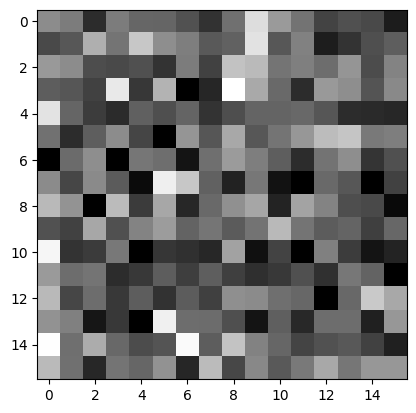

In [ ]:
encode = encoder.predict(x_val[0].reshape(-1,28,28,1))[0]

print(encode.reshape((16,16)))
plt.imshow(encode.reshape((16,16)), cmap='gray')

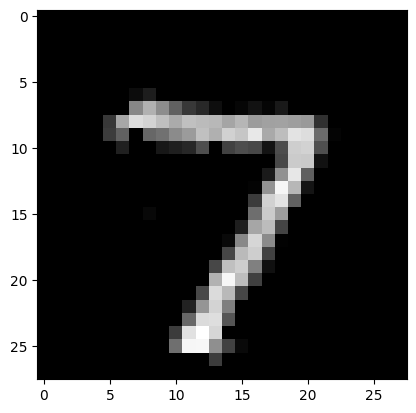

In [26]:
plt.imshow(test, cmap='gray');

# **Data Preparation**

In [3]:
BATCH_SIZE = 96
IMG_SIZE = (120, 120, 1)
DIRECTORY_PATH = r"C:\Users\LENOVO\Desktop\New folder (3)"

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DIRECTORY_PATH,
    seed=69,
    color_mode='grayscale',
    image_size=IMG_SIZE[0:2],
    batch_size=BATCH_SIZE,
    label_mode=None
)


Found 1060 files.


In [5]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [51]:
def load_image_from_path(image_path, image_size=(120, 120)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size, color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    return np.expand_dims(img, axis=0)

def show_model_comparisons(image_path, models, model_names, image_size=(120, 120)):
    input_img = load_image_from_path(image_path, image_size=image_size)

    plt.figure(figsize=(4 * (len(models) + 1), 4))
    plt.subplot(1, len(models) + 1, 1)
    plt.imshow(input_img[0].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    for i, (model, name) in enumerate(zip(models, model_names)):
        pred = model.predict(input_img)
        plt.subplot(1, len(models) + 1, i + 2)
        plt.imshow(pred[0].squeeze(), cmap='gray')
        plt.title(name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [53]:
testImg = load_image_from_path(r"C:\Users\LENOVO\Desktop\New folder (3)\20250215_144302.jpg")
testImg.shape

(1, 120, 120, 1)

In [6]:
FILL_MODE = 'nearest'
VALUE_RANGE = [0.0, 1.0]

augment1 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1,fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

augment2 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomBrightness((-0.5, 0.5), value_range=VALUE_RANGE),
    tf.keras.layers.RandomTranslation((-0.2, 0.3), (-0.3, 0.2), fill_mode=FILL_MODE),
    tf.keras.layers.RandomContrast(0.1),
])

augment3 = tf.keras.Sequential([
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomBrightness((-0.35, 0.35), value_range=VALUE_RANGE),
    tf.keras.layers.RandomRotation(0.3,fill_mode=FILL_MODE),
    tf.keras.layers.Resizing(120, 120)
])

augment4 = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1)
])

augment5 = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomBrightness((-0.2, 0.5), value_range=VALUE_RANGE),
])

augment6 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.25, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomCrop(100, 100),
    tf.keras.layers.Resizing(120, 120)
])

augment7 = tf.keras.Sequential([
    tf.keras.layers.RandomTranslation(0.4, 0.4, fill_mode=FILL_MODE),
    tf.keras.layers.RandomRotation(0.4, fill_mode=FILL_MODE),
    tf.keras.layers.RandomHeight(0.3),
    tf.keras.layers.RandomWidth(0.3),
    tf.keras.layers.RandomBrightness((-0.5, 0.5), value_range=VALUE_RANGE),
    tf.keras.layers.Resizing(120, 120)
])

augment8 = tf.keras.Sequential([
    tf.keras.layers.RandomCrop(100, 100),
    tf.keras.layers.Resizing(120, 120),
    tf.keras.layers.RandomBrightness((-0.3, 0.3), value_range=VALUE_RANGE),
    tf.keras.layers.RandomContrast(0.2)
])

augment9 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomBrightness((-0.4, 0.4), value_range=VALUE_RANGE),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom((-0.3, 0.3)),
    tf.keras.layers.Resizing(120, 120)
])

augment10 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomTranslation(0.3, 0.3, fill_mode=FILL_MODE),
    tf.keras.layers.RandomRotation(0.5, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomBrightness((-0.6, 0.6), value_range=VALUE_RANGE),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomCrop(110, 110),
    tf.keras.layers.Resizing(120, 120)
])

def preprocess(pipeline = None):
    def augment(img):
        img = tf.cast(img, tf.float32) / 255.0
        if pipeline is not None:
           img =  pipeline(img)
        return img, img
    return augment

In [7]:
augment3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_height (RandomHeight)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness_1             │ ?                      │   0 (unbuilt) │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
augments = [augment1, augment2, augment3, augment4, augment5, augment10, augment9, augment8, augment7, augment6]

def dataset_preparation(base_ds, augmentations, preprocess_fn, seed=12):
    """
    Applies multiple augmentations to a dataset and returns a shuffled, preprocessed dataset.

    Args:
        base_ds (tf.data.Dataset): Original dataset from image_dataset_from_directory.
        augmentations (list): List of augmentation functions.
        preprocess_fn (callable): A wrapper function that applies augmentation.
        seed (int): Seed for consistent shuffling.

    Returns:
        tf.data.Dataset: Combined and shuffled dataset with all augmentations + original.
    """
    augmented_datasets = [
        base_ds.map(preprocess_fn(aug), num_parallel_calls=tf.data.AUTOTUNE)
        for aug in augmentations
    ]

    original_dataset = base_ds.map(preprocess_fn(), num_parallel_calls=tf.data.AUTOTUNE)

    combined_dataset = augmented_datasets + [original_dataset]

    combined = tf.data.Dataset.sample_from_datasets(combined_dataset, seed=seed)
    return combined.shuffle(buffer_size=len(base_ds), seed=seed).prefetch(tf.data.AUTOTUNE)


In [9]:
trainData = dataset_preparation(train_ds, augments, preprocess)
trainData

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None))>

# **Loss Functions**

In [11]:
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(120, 120, 3))
vgg.trainable = False
feature_extractor = tf.keras.Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)

@tf.keras.utils.register_keras_serializable()
def perceptual_loss(y_true, y_pred):
    y_true_rgb = tf.image.grayscale_to_rgb(y_true)
    y_pred_rgb = tf.image.grayscale_to_rgb(y_pred)
    true_features = feature_extractor(y_true_rgb)
    pred_features = feature_extractor(y_pred_rgb)
    return tf.reduce_mean(tf.abs(true_features - pred_features))


In [10]:
@register_keras_serializable()
def mean_similarity(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return mse + (1 - ssim)*0.4


def mean_crossentropy(y_true, y_pred):
    bce = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred), axis=[1,2])
    mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=[1, 2, 3])
    return 0.45 * bce + 0.55 * mse

@register_keras_serializable()
def cross_similarity(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    ssim = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return bce*0.6 + (1 - ssim)*0.4

# **Model Training**

In [13]:
input_img = tf.keras.layers.Input(shape=IMG_SIZE)

##  **1. Test Encoder**

In [20]:
x = tf.keras.layers.Conv2D(32, (11, 11), strides=1, activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, (7, 7), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = tf.keras.Model(input_img, encoded, name='encoder')

# ---------------- Decoder ----------------
x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 120, 120, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 120, 120, 32)   │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 64)     │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 30, 30, 128)    │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 60, 60, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 120, 120, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 120, 120, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 120, 120, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,097 (1.60 MB)

 Trainable params: 419,201 (1.60 MB)

 Non-trainable params: 896 (3.50 KB)

Through trial and error, figured out that the combination of `SSIM` and `binary_crossentropy` seem to work the best as the loss function

In [ ]:
autoencoder.compile(optimizer='adam', loss=cross_similarity)

autoencoder.fit(
        trainData.repeat(),
        epochs=20,
        steps_per_epoch=50
    )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


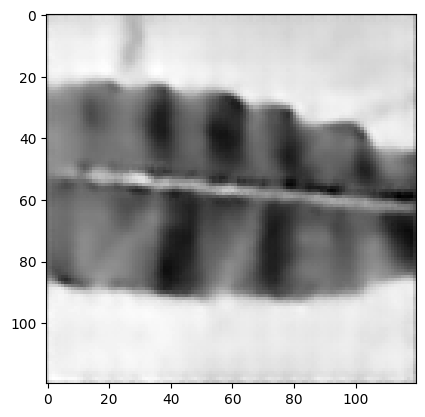

In [18]:
prediction = autoencoder.predict(testImg)
plt.imshow(prediction[0], cmap='gray');

## **2. UNet Encoders**

In [ ]:
# --- Encoder ---
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

# --- Bottleneck ---
bn = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
bn = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn)

# --- Decoder ---
u3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(bn)
u3 = tf.keras.layers.Concatenate()([u3, c3])
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

u2 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c4)
u2 = tf.keras.layers.Concatenate()([u2, c2])
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

u1 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c5)
u1 = tf.keras.layers.Concatenate()([u1, c1])
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u1)
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c6)


autoencoder2 = tf.keras.Model(input_img, outputs, name="autoencoder2")
autoencoder2.summary()

#

In [16]:
log_dir = "logs/profile/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    profile_batch=(5, 15),
    histogram_freq=1  
)

In [17]:
autoencoder2.compile(optimizer='adam', loss=mean_similarity)

autoencoder2.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50,
    callbacks=[tensorboard]
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - loss: 0.1222
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - loss: 0.0225
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - loss: 0.0093
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - loss: 0.0061
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - loss: 0.0038
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - loss: 0.0028
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - loss: 0.0022
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - loss: 0.0018
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - loss: 0.0020
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - loss: 0.0016
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - loss: 0.0016
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - loss: 0.0012
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - loss: 0.0012
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - loss: 9.8118e-04
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - loss: 0.0011


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


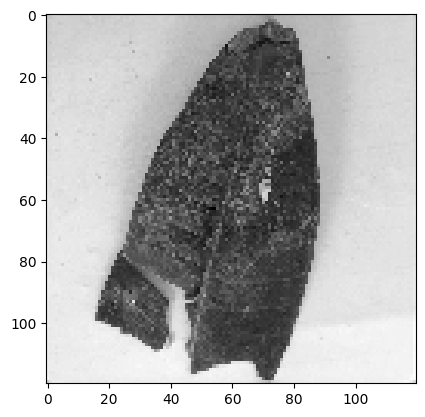

In [19]:
prediction2 = autoencoder2.predict(testImg)
plt.imshow(prediction2[0], cmap='gray');

In [21]:
autoencoder2.save(r'models/UnetMS.keras')

In [ ]:
# --- Encoder ---
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(e1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(e1)

e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(p1)
e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(e2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(e2)

e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(p2)
e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(e3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(e3)

e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(p3)
e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(e4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(e4)

# --- Latent Space ---
l1 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(p4)
l2 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l1)
l3 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l2)
l4 = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l3)

# --- Decoder ---
u4 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2))(l4)
u4 = tf.keras.layers.Concatenate()([u4, e4])
c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u4)
c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

u3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(c3)
u3 = tf.keras.layers.Concatenate()([u3, e3])
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

u2 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(c4)
u2 = tf.keras.layers.Concatenate()([u2, e2])
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

u1 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(c5)
u1 = tf.keras.layers.Concatenate()([u1, e1])
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u1)
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(c6)
# --- Model ---
unet2 = tf.keras.Model(input_img, outputs)
unet2.summary()


In [47]:
unet2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

unet2.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - loss: 0.4702
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - loss: 0.3429
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - loss: 0.2893
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - loss: 0.2194
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - loss: 0.2133
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - loss: 0.2072
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - loss: 0.1969
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - loss: 0.2014
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - loss: 0.1904
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - loss: 0.1947
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - loss: 0.1924
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - loss: 0.1845
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - loss: 0.1892
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - loss: 0.1811
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - loss: 0.1872
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


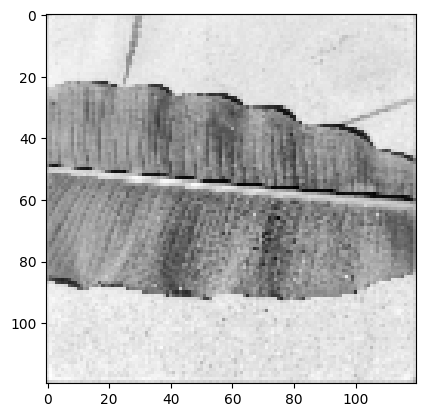

In [48]:
prediction3 = unet2.predict(testImg)
plt.imshow(prediction3[0], cmap='gray');

In [55]:
tf.image.ssim(prediction2, prediction3, max_val=1.0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9817731], dtype=float32)>

In [57]:
unet2.save(r"models\Unet2.keras")

## **3. ResNet Encoders**

In [35]:
def residual_block(x, filters):
    skip = x
    
    if skip.shape[-1] != filters:
        skip = tf.keras.layers.Conv2D(filters, 1, padding='same')(skip)
    
    x = tf.keras.layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(filters, 3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.add([x, skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
# --- Encoder ---
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)         
x = tf.keras.layers.BatchNormalization()(x)                                             
x = tf.keras.layers.MaxPooling2D(2)(x)                                                  
x = residual_block(x, 64)                                                      
x = tf.keras.layers.MaxPooling2D(2)(x)                                                  

x = residual_block(x, 128)                                                     
x = tf.keras.layers.MaxPooling2D(2)(x)                                                  

x = residual_block(x, 256)                                                     
x = tf.keras.layers.Dropout(0.3)(x)                                                     

# --- Latent space ---
x = tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)                
x = tf.keras.layers.BatchNormalization()(x)                                             

# --- Decoder ---
x = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=2, padding='same', activation='relu')(x) 
x = residual_block(x, 256)                                                     

x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu')(x) 
x = tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=2, padding='same', activation='sigmoid')(x) 

# --- Model ---
residualEncoder = tf.keras.Model(input_img, x)
residualEncoder.summary()


In [37]:
residualEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=mean_similarity)

residualEncoder.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - loss: 0.2872
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - loss: 0.1200
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - loss: 0.0925
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - loss: 0.0800
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - loss: 0.0688
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - loss: 0.0703
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - loss: 0.0673
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - loss: 0.0625
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - loss: 0.0619
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - loss: 0.0575
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - loss: 0.0636
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - loss: 0.0506
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - loss: 0.0490
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - loss: 0.0622
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - loss: 0.0482
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


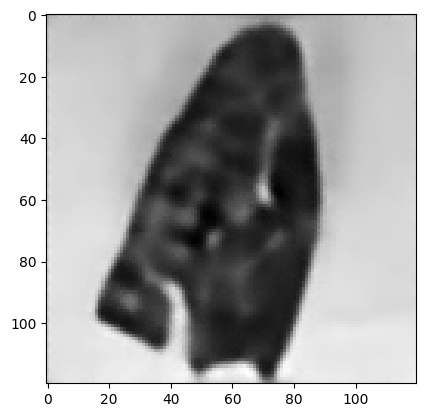

In [38]:
predictionN = residualEncoder.predict(testImg)
plt.imshow(predictionN[0], cmap='gray');

In [40]:
residualEncoder.save(r'models\ResidualEncoder.keras')

In [ ]:
# Encoder
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
e1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(e1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(e1)

e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(p1)
e2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(e2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(e2)

e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(p2)
e3 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(e3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(e3)

e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(p3)
e4 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(e4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(e4)

# Latent Space
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(p4)
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l)
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l)
l = tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same')(l)

# Decoder with Residual Blocks
u4 = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2))(l)
u4 = tf.keras.layers.Concatenate()([u4, e4])
u4 = residual_block(u4, 256)

u3 = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(u4)
u3 = tf.keras.layers.Concatenate()([u3, e3])
u3 = residual_block(u3, 128)

u2 = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(u3)
u2 = tf.keras.layers.Concatenate()([u2, e2])
u2 = residual_block(u2, 64)

u1 = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(u2)
u1 = tf.keras.layers.Concatenate()([u1, e1])
u1 = residual_block(u1, 32)

# Output
output_img = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(u1)

# Autoencoder Model
perceptualEncoder = tf.keras.Model(inputs=input_img, outputs=output_img, name='Perceptualencoder')
perceptualEncoder.summary()

In [23]:
perceptualEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

perceptualEncoder.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - loss: 0.5709
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 309s 6s/step - loss: 0.2905
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 275s 5s/step - loss: 0.2461
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - loss: 0.2391
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.2276
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - loss: 0.2150
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.2023
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - loss: 0.2071
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.1934
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - loss: 0.1982
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - loss: 0.1952
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - loss: 0.1980
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - loss: 0.2071
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - loss: 0.1958
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 256s 5s/step - loss: 0.2017
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


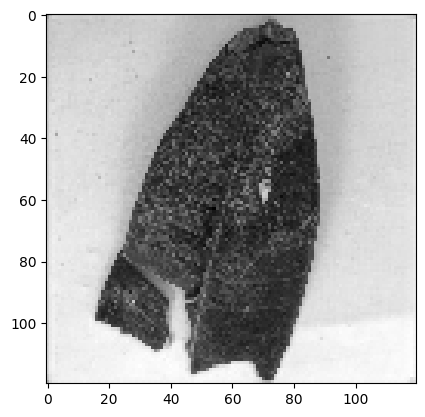

In [35]:
prediction4 = perceptualEncoder.predict(testImg)
plt.imshow(prediction4[0], cmap='gray');

In [26]:
perceptualEncoder.save(r'models/UResNetEncoder.keras')

## **4. MobileNet Encoder**

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(120, 120, 3), 
    include_top=False,
    weights=None 
)

x = tf.keras.layers.Concatenate()([input_img, input_img, input_img])  

encoded = base_model(x)
encoded = tf.keras.layers.Conv2D(512, 1, activation='relu')(encoded)

x = tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same', activation='relu')(encoded)
x = tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.Resizing(120, 120)(x)
decoded = tf.keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

mobileEncoder = tf.keras.Model(input_img, decoded)
mobileEncoder.summary()

In [ ]:
mobileEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

mobileEncoder.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


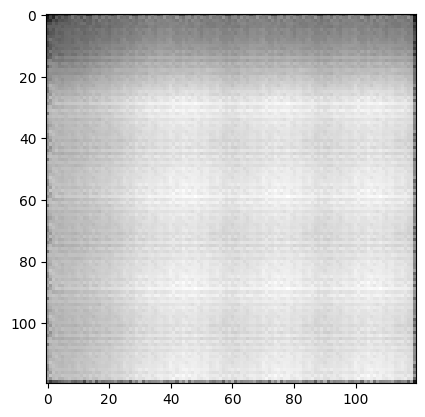

In [65]:
prediction5 = mobileEncoder.predict(testImg)
plt.imshow(prediction5[0], cmap='gray');

## **5. Attention Encoder**

In [32]:
# Attention Gate
def Attention(x, g, inter_channels):
    theta = tf.keras.layers.Conv2D(inter_channels, (1, 1), padding='same')(x)
    phi = tf.keras.layers.Conv2D(inter_channels, (1, 1), padding='same')(g)
    add = tf.keras.layers.Add()([theta, phi])
    act = tf.keras.layers.Activation('relu')(add)
    psi = tf.keras.layers.Conv2D(1, (1, 1), padding='same')(act)
    sig = tf.keras.layers.Activation('sigmoid')(psi)
    return tf.keras.layers.Multiply()([x, sig])

In [ ]:
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)  

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)  

c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)  

# Bottleneck
bn = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
bn = tf.keras.layers.BatchNormalization()(bn)
bn = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(bn)
bn = tf.keras.layers.BatchNormalization()(bn)  

# Decoder
u3 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn)  
a3 = Attention(c3, u3, 128)  
u3 = tf.keras.layers.concatenate([u3, a3])
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)  

u2 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)  
a2 = Attention(c2, u2, 64)  
u2 = tf.keras.layers.concatenate([u2, a2])
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)  

u1 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c5)  
a1 = Attention(c1, u1, 32)  
u1 = tf.keras.layers.concatenate([u1, a1])
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u1)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6) 

# Output
output_layer = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c6)  

attentionEncoder = tf.keras.models.Model(inputs=input_img, outputs=output_layer)
attentionEncoder.summary()

In [ ]:
attentionEncoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=cross_similarity)

attentionEncoder.fit(
    trainData.repeat(),
    epochs=20,
    steps_per_epoch=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


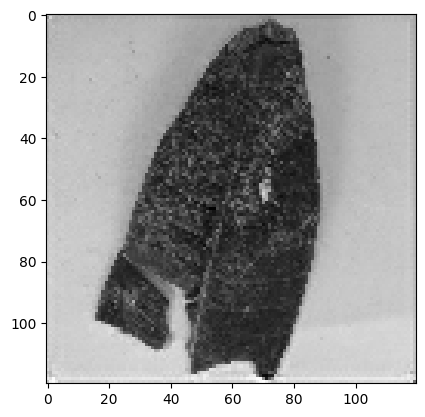

In [37]:
prediction6 = attentionEncoder.predict(testImg)
plt.imshow(prediction6[0], cmap='gray');

In [ ]:
attentionEncoder.save(r'models\AttentionEncoder.keras')

# **Ensemble**

In [14]:
def ensemble_prediction(models, input_data, method='average', weights=None):
    if isinstance(input_data, tf.data.Dataset):
        all_outputs = []
        for batch in input_data:
            if isinstance(batch, tuple):
                batch = batch[0]
            batch_outputs = [model.predict(batch, verbose=0) for model in models]
            batch_outputs = tf.stack(batch_outputs, axis=0) 
            
            if method == 'average':
                ensemble_batch = tf.reduce_mean(batch_outputs, axis=0)
            elif method == 'weighted':
                if weights is None or len(weights) != len(models):
                    raise ValueError("Weights must be provided and match number of models.")
                weights_tensor = tf.reshape(tf.convert_to_tensor(weights, dtype=tf.float32), (-1, 1, 1, 1, 1))  
                ensemble_batch = tf.reduce_sum(batch_outputs * weights_tensor, axis=0)
            else:
                raise ValueError(f"Unknown ensemble method: {method}")
                
            all_outputs.append(ensemble_batch)

        return tf.concat(all_outputs, axis=0)

    else:
        outputs = [model.predict(input_data, verbose=0) for model in models]
        outputs = tf.stack(outputs, axis=0)  

        if method == 'average':
            return tf.reduce_mean(outputs, axis=0)

        elif method == 'weighted':
            if weights is None or len(weights) != len(models):
                raise ValueError("Weights must be provided and match number of models.")
            weights_tensor = tf.reshape(tf.convert_to_tensor(weights, dtype=tf.float32), (-1, 1, 1, 1, 1))  
            return tf.reduce_sum(outputs * weights_tensor, axis=0)

        else:
            raise ValueError(f"Unknown ensemble method: {method}")


In [12]:
unet_1_encoder= tf.keras.models.load_model(r"C:\Users\LENOVO\Desktop\Auto-Forest\models\UnetInspired.keras",
                                          custom_objects={'cross_similarity': cross_similarity})

unet_2_enocder= tf.keras.models.load_model(r"C:\Users\LENOVO\Desktop\Auto-Forest\models\Unet2.keras",
                                          custom_objects={'cross_similarity': cross_similarity})

residual_skip_encoder= tf.keras.models.load_model(r"C:\Users\LENOVO\Desktop\Auto-Forest\models\UResNetEncoder.keras",
                                          custom_objects={'cross_similarity': cross_similarity})

attention_encoder= tf.keras.models.load_model(r"C:\Users\LENOVO\Desktop\Auto-Forest\models\AttentionEncoder.keras",
                                          custom_objects={'cross_similarity': cross_similarity})

In [43]:
models = [unet_1_encoder, unet_2_enocder, residual_skip_encoder, attention_encoder]

predictionAgg = ensemble_prediction(models, trainData.take(1), method='average')

96


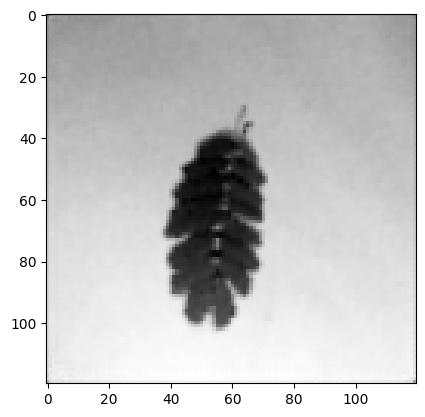

In [47]:
print(len(predictionAgg))
plt.imshow(predictionAgg[9], cmap='gray');

# **Classification**

In [14]:
for i, layer in enumerate(attention_encoder.layers):
    print(i, layer.name)

0 input_layer_12
1 conv2d
2 batch_normalization
3 conv2d_1
4 batch_normalization_1
5 max_pooling2d
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 conv2d_5
14 batch_normalization_5
15 max_pooling2d_2
16 conv2d_6
17 batch_normalization_6
18 conv2d_7
19 batch_normalization_7
20 conv2d_transpose
21 conv2d_8
22 conv2d_9
23 add
24 activation
25 conv2d_10
26 activation_1
27 multiply
28 concatenate
29 conv2d_11
30 batch_normalization_8
31 conv2d_12
32 batch_normalization_9
33 conv2d_transpose_1
34 conv2d_13
35 conv2d_14
36 add_1
37 activation_2
38 conv2d_15
39 activation_3
40 multiply_1
41 concatenate_1
42 conv2d_16
43 batch_normalization_10
44 conv2d_17
45 batch_normalization_11
46 conv2d_transpose_2
47 conv2d_18
48 conv2d_19
49 add_2
50 activation_4
51 conv2d_20
52 activation_5
53 multiply_2
54 concatenate_2
55 conv2d_21
56 batch_normalization_12
57 conv2d_22
58 batch_normalization_13
59 conv2d_23


Latent Layers of following models:
- UnetMS/UnetInspired: `conv2d_11`
- Unet2: `conv2d_284`
- UResNet: `conv2d_59`
- Attention: `batch_normalization_7`

In [13]:
models = [unet_1_encoder, unet_2_enocder, residual_skip_encoder, attention_encoder]
latent_layers = ['conv2d_11', 'conv2d_284', 'conv2d_59', 'batch_normalization_7']

In [14]:
def evaluate(models, input_data):
    input_data = input_data.prefetch(tf.data.AUTOTUNE)
    all_losses = []

    @tf.function
    def compute_losses(x_batch, y_batch):
        batch_size = tf.shape(x_batch)[0]
        model_losses = []
        
        for model in models:
            predictions = model(x_batch, training=False)
            loss = model.compute_loss(x_batch, y_batch, predictions)
            if len(tf.shape(loss)) == 0:  
                loss = tf.repeat(loss, batch_size)
            model_losses.append(loss)
            
        return tf.stack(model_losses, axis=0)

    for batch in input_data:
        if isinstance(batch, tuple):
            x_batch, y_batch = batch
        else:
            x_batch = y_batch = batch

        batch_losses = compute_losses(x_batch, y_batch)
        all_losses.append(batch_losses)

    if not all_losses:
        return tf.zeros([0, len(models)])
        
    concatenated = tf.concat(all_losses, axis=1)
    
    return tf.transpose(concatenated)

In [15]:
def build_latent_models(models, latent_layer_names):
    return [tf.keras.Model(inputs=m.input, outputs=m.get_layer(name).output)
            for m, name in zip(models, latent_layer_names)]

def latent_outputs(models, input_data, latent_layer_names):
    input_data = input_data.prefetch(tf.data.AUTOTUNE)
    latent_models = build_latent_models(models, latent_layer_names)
    latent_matrix = []

    @tf.function
    def compute_latents(x_batch):
        latents = [tf.reshape(latent_model(x_batch, training=False), [tf.shape(x_batch)[0], -1])
                   for latent_model in latent_models]
        return tf.concat(latents, axis=1)

    for batch in input_data:
        if isinstance(batch, tuple):
            x_batch, _ = batch
        else:
            x_batch = batch

        concat_latents = compute_latents(x_batch)
        latent_matrix.append(concat_latents)

    return tf.concat(latent_matrix, axis=0)

In [16]:
def concat(models, input_data, latent_layer_names, label=True):
    if isinstance(input_data, tf.data.Dataset):
        loss = evaluate(models=models, input_data=input_data)
        latent = latent_outputs(models=models, input_data=input_data, latent_layer_names=latent_layer_names)
        input_len = tf.shape(loss)[0].numpy()
        print(input_len)
        print(tf.shape(latent)[0])
        labels = tf.ones((input_len, 1), dtype=tf.float32) if label else tf.zeros((input_len, 1), dtype=tf.float32)

        concat_data = tf.concat([loss, latent], axis=1)
        labeled_dataset = tf.data.Dataset.from_tensor_slices((concat_data, labels)).prefetch(tf.data.AUTOTUNE)

        return labeled_dataset

In [17]:
def concat_seen_unseen(models, seen_data, unseen_data, latent_layer_names):
    seen = concat(models, seen_data, latent_layer_names, label=True)
    unseen = concat(models, unseen_data, latent_layer_names, label=False)  
    return seen.concatenate(unseen).prefetch(tf.data.AUTOTUNE)

### **1. Threshold Data Prep**

In [18]:
UNSEEN_PATH = r"C:\Users\LENOVO\Desktop\Unseen"

unseen_ds = tf.keras.utils.image_dataset_from_directory(
    UNSEEN_PATH,
    seed=69,
    color_mode='grayscale',
    image_size=IMG_SIZE[0:2],
    batch_size=BATCH_SIZE,
    label_mode=None
)

Found 208 files.


In [19]:
unseenData = dataset_preparation(unseen_ds, augments, preprocess)
unseenData

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120, 120, 1), dtype=tf.float32, name=None))>

In [20]:
threshData = concat_seen_unseen(models, trainData.shuffle(50, seed=8).take(47), unseenData.repeat(2), latent_layers)

4512
tf.Tensor(4512, shape=(), dtype=int32)
4576
tf.Tensor(4576, shape=(), dtype=int32)


In [21]:
threshData = threshData.batch(64).unbatch().shuffle(9088, seed=12).batch(64)

In [22]:
no_of_batches = 142

train_spilt = int(0.8*no_of_batches)

threshTrain = threshData.take(train_spilt).prefetch(tf.data.AUTOTUNE)
threshTest = threshData.skip(train_spilt).prefetch(tf.data.AUTOTUNE)

In [ ]:
def count(data):
    for _, y in data:
        print(y)

count(threshTrain.take(2))

### **Threshold Model Training**

In [23]:
thresholdModel = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(165380,)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

thresholdModel.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                       metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

thresholdModel.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │   338,700,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 341,090,945 (1.27 GB)

 Trainable params: 341,084,161 (1.27 GB)

 Non-trainable params: 6,784 (26.50 KB)

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True,monitor='recall'),
             tf.keras.callbacks.ModelCheckpoint(r'C:\Users\LENOVO\Desktop\BestThresholdPredictor.keras', save_best_only=True, monitor='recall')]

In [27]:
thresholdModel.fit(
    threshTrain.repeat(),
    epochs=20,
    steps_per_epoch=71,
    callbacks=callbacks)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.7640 - auc: 0.8470 - loss: 0.4879 - precision: 0.7406 - recall: 0.7902
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.7659 - auc: 0.8592 - loss: 0.4702 - precision: 0.7650 - recall: 0.7788
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.7882 - auc: 0.8757 - loss: 0.4418 - precision: 0.7715 - recall: 0.8121
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7822 - auc: 0.8727 - loss: 0.4461 - precision: 0.7828 - recall: 0.7905
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8014 - auc: 0.8818 - loss: 0.4320 - precision: 0.7991 - recall: 0.8033
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.8053 - auc: 0.8918 - loss: 0.4153 - precision: 0.7902 - recall: 0.8136
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8048 - auc: 0.8920 - loss: 0.4107 - precision: 0.8011 - recall: 0.8145
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/st

In [29]:
thresholdModel.save(r"C:\Users\LENOVO\Desktop\ThresholdPredictor.keras")

In [30]:
def threshold_predictor(model, dataset):

    @tf.function
    def proba_predictor(dataset):
        probs = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
        labels = tf.TensorArray(tf.float32, size=0, dynamic_size=True)

        for x_batch, y_batch in dataset:
            for i in tf.range(tf.shape(x_batch)[0]):
                x = tf.reshape(x_batch[i], [-1])
                pred = model(tf.expand_dims(x, 0), training=False)
                probs = probs.write(probs.size(), pred[0][0])
                labels = labels.write(labels.size(), y_batch[i])

        return probs.stack(), labels.stack()
    
    y_probs, y_true = proba_predictor(dataset)
    y_probs = y_probs.numpy()
    y_true = y_true.numpy()

    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1 = 2*(precisions*recalls)/(precisions + recalls + 1e-8)

    best_thresh = thresholds[np.argmax(f1)]
    best_f1 = np.max(f1)

    return best_thresh, best_f1

In [44]:
thresholdModel = tf.keras.models.load_model(r"C:\Users\LENOVO\Desktop\ThresholdPredictor.keras")

In [45]:
threshold, f1 = threshold_predictor(thresholdModel, threshTest)
threshold

np.float32(0.31978017)

In [58]:
def inference(predictor, data, models, latent_layers_names, threshold=0.5):
    if isinstance(data, tf.data.Dataset):
        loss = evaluate(models=models, input_data=data)
        latent = latent_outputs(models=models, input_data=data, latent_layer_names=latent_layers_names)
        concat_data = tf.concat([loss, latent], axis=1)

    else:    
        x = data

        if not isinstance(x, tf.Tensor):
            x = tf.convert_to_tensor(x, dtype=tf.float32)
        
        if len(x.shape) == 3:  
            x = tf.expand_dims(x, axis=0)  
        
        x = tf.data.Dataset.from_tensor_slices(x).batch(32).prefetch(tf.data.AUTOTUNE)
        
        loss = evaluate(models=models, input_data=x)
        latent = latent_outputs(models=models, input_data=x, latent_layer_names=latent_layers_names)
        concat_data = tf.concat([loss, latent], axis=1)

    scores = predictor(concat_data, training=False)
    predictions = tf.cast(scores >= threshold, tf.int32)

    return predictions.numpy()

In [49]:
pred = inference(thresholdModel, trainData.take(10), models, latent_layers, threshold)

In [50]:
print(len(pred))
pred.sum()

960


np.int64(902)

## **Pipeline Testing**

In [1]:
import AutoForestClassifier

afc = AutoForestClassifier

In [2]:
pipelineTestImg = afc.load_image_from_path(r"C:\Users\LENOVO\Desktop\New folder (3)\20250215_143820.jpg")

In [3]:
classification, reconstruction = afc.AutoencoderClassifier().auto_forest_pipeline(data=pipelineTestImg)

In [4]:
classification

array('MBM', dtype='<U3')

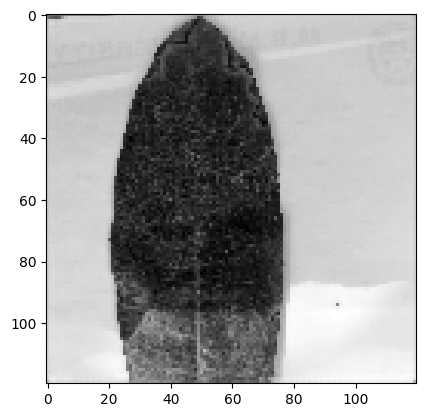

In [5]:
import matplotlib.pyplot as plt

plt.imshow(reconstruction[0,:,:,:], cmap='gray')